# Car details

## Data

In [363]:
import numpy as np 
import pandas as pd
import os

In [364]:
# Import data
column_names = ['NAME', 'YEAR', 'SELLING_PRICE', 'KM_DRIVEN', 'FUEL', 'SELLER_TYPE', 'TRANSMISSION', 'OWNER', 'MILAGE', 'ENGINE','MAX_POWER', 'TORQUE', 'SEATS']
data = pd.read_csv('data/car_details.csv', header=None, delimiter=r",", names=column_names)

In [365]:
print(data.head(5))

                           NAME  YEAR  SELLING_PRICE  KM_DRIVEN    FUEL  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  SELLER_TYPE TRANSMISSION         OWNER      MILAGE   ENGINE   MAX_POWER  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     TORQUE  SEATS  
0            190Nm@ 2000rpm    5.0  
1       250N

In [366]:
# Dimensions of the dataset
print(np.shape(data))

(8128, 13)


In [367]:
# Descibe describable columns
print(data.describe())

              YEAR  SELLING_PRICE     KM_DRIVEN        SEATS
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


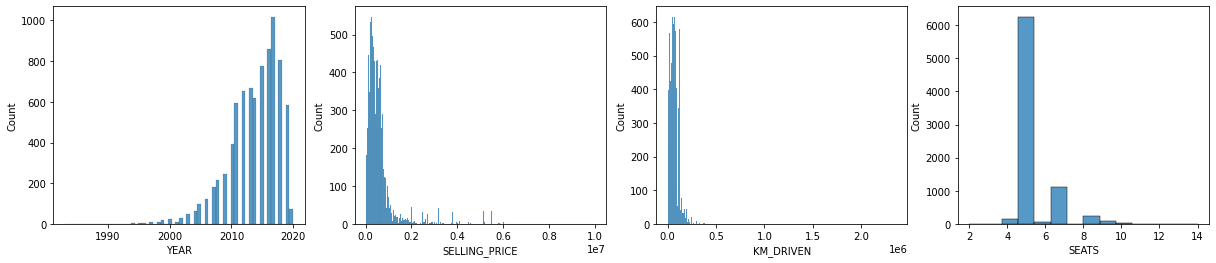

In [368]:
# Display valid columns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

column_names = ['YEAR', 'SELLING_PRICE', 'KM_DRIVEN', 'SEATS']
data = data[column_names]
fig, axs = plt.subplots(1, 4)
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v, ax=axs[index])
    index += 1
matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=2.8, top=None, wspace=None, hspace=None)

## Linear Regression

In [369]:
import numpy as np
import torch
import pandas as pd

In [370]:
df = pd.DataFrame(data)
df.columns = column_names
# print(df.iloc[:,-4:])
df.head()

,YEAR,SELLING_PRICE,KM_DRIVEN,SEATS
0,2014,450000,145500,5.0
1,2014,370000,120000,5.0
2,2006,158000,140000,5.0
3,2010,225000,127000,5.0
4,2007,130000,120000,5.0


In [371]:
df.describe()

,YEAR,SELLING_PRICE,KM_DRIVEN,SEATS
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [463]:
data = df[df.columns[:-1]]
data = data.apply(
    lambda x: (x - x.mean()) / x.std()
)

data['SELLING_PRICE'] = df.SELLING_PRICE

In [531]:
X = df.iloc[:,2].to_numpy()
# Don't use data['Price'].to_numpy() in this case. It would return the wrong shape
Y = df.iloc[:,1].to_numpy()
X2 = []
Y2 = []
for i in range(len(X)):
    X2.append(X[i]/1000)
for i in range(len(Y)):
    Y2.append(Y[i]/1000)
X = np.array(X2)
Y = np.array(Y2)
X = X.reshape(8128, 1)
Y = Y.reshape(8128, 1)

X.shape
Y.shape

(8128, 1)

In [532]:
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(8128, 1)
(8128, 1)


In [533]:
inputs = torch.from_numpy(X)
inputs = inputs.float()
targets = torch.from_numpy(Y)
targets = targets.float()
print(inputs)
print(targets)

tensor([[145.5000],
        [120.0000],
        [140.0000],
        ...,
        [120.0000],
        [ 25.0000],
        [ 25.0000]])
tensor([[450.],
        [370.],
        [158.],
        ...,
        [382.],
        [290.],
        [290.]])


In [534]:
import torch.nn as nn
from torch.utils.data import TensorDataset
# Define dataset 
train_ds = TensorDataset(inputs, targets)
train_ds

In [535]:
from torch.utils.data import DataLoader

In [536]:
# Define DataLoader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [537]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 65.],
        [120.],
        [ 33.],
        [ 40.],
        [260.]])
tensor([[195.],
        [ 85.],
        [610.],
        [890.],
        [550.]])


In [538]:
# Define model
model = nn.Linear(1,1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.7390]], requires_grad=True)
Parameter containing:
tensor([0.9035], requires_grad=True)


In [539]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[-0.7390]], requires_grad=True),
 Parameter containing:
 tensor([0.9035], requires_grad=True)]

In [540]:
# Generate predictions
preds = model(inputs.float())
preds

tensor([[-106.6251],
        [ -87.7799],
        [-102.5604],
        ...,
        [ -87.7799],
        [ -17.5722],
        [ -17.5722]], grad_fn=<AddmmBackward>)

## Loss Function

In [541]:
import torch.nn.functional as F

In [542]:
# Define loss function
loss_fn = F.mse_loss
print(type(inputs))
print(type(targets))
print(inputs.shape)
print(targets.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([8128, 1])
torch.Size([8128, 1])


In [543]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(1111189.2500, grad_fn=<MseLossBackward>)


## Optimizer

In [544]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

## Train the model

In [545]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    
    # Repeat for a given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb, yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
            
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [ ]:
fit(100, model, loss_fn, opt)

Epoch [10/100], Loss: 759409.4375
Epoch [20/100], Loss: 83761.7188
Epoch [30/100], Loss: 18940.8574
Epoch [40/100], Loss: 31535.4043
Epoch [50/100], Loss: 91490.4453


In [ ]:
# Generate predictions 
preds = model(inputs)
preds

In [ ]:
# Compare with targets
targets